In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import requests

weather = pd.read_csv('../Summative/weather_5yrs.csv')
spotify = pd.read_csv("../Summative/5yr_jpgb_top10.csv")
weather.head()

,year,month,tmax,tmin,af,rain,sun,station
0,2016,1,8.9,4.5,0.0,146.0,25.5,aberporth
1,2016,2,7.8,3.5,2.0,85.6,64.4,aberporth
2,2016,3,8.7,3.5,0.0,64.4,129.5,aberporth
3,2016,4,10.2,4.9,0.0,52.2,143.9,aberporth
4,2016,5,15.2,8.8,0.0,56.4,190.9,aberporth


In [3]:
#getting month_year
weather['year_month'] = weather['year'].astype(str) + '/' + weather['month'].astype(str).str.zfill(2)
weather.head()

,year,month,tmax,tmin,af,rain,sun,station,year_month
0,2016,1,8.9,4.5,0.0,146.0,25.5,aberporth,2016/01
1,2016,2,7.8,3.5,2.0,85.6,64.4,aberporth,2016/02
2,2016,3,8.7,3.5,0.0,64.4,129.5,aberporth,2016/03
3,2016,4,10.2,4.9,0.0,52.2,143.9,aberporth,2016/04
4,2016,5,15.2,8.8,0.0,56.4,190.9,aberporth,2016/05


In [4]:
#getting month_year
spotify['date'] = pd.to_datetime(spotify['date'], format='mixed')
spotify['month'] = spotify['date'].dt.month
spotify['year'] = spotify['date'].dt.year
spotify['year_month'] = spotify['year'].astype(str) + '/' + spotify['month'].astype(str).str.zfill(2)
spotify.head()

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name,month,year,year_month
0,2018-04-26,jp,1,197044,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,4,2018,2018/04
1,2018-03-05,jp,5,143780,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,3,2018,2018/03
2,2017-04-13,gb,8,2227770,5Ohxk2dO5COHF1krpoPigN,['Harry Styles'],['pop'],340706,False,Sign of the Times,4,2017,2017/04
3,2018-04-10,gb,8,1744391,0E9ZjEAyAwOXZ7wJC0PD33,"['Dynoro', ""Gigi D'Agostino""]","['eurodance', 'europop', 'pop dance', 'electro...",184560,False,In My Mind,4,2018,2018/04
4,2018-11-10,gb,7,1976971,0E9ZjEAyAwOXZ7wJC0PD33,"['Dynoro', ""Gigi D'Agostino""]","['eurodance', 'europop', 'pop dance', 'electro...",184560,False,In My Mind,11,2018,2018/11


In [5]:
#merging datasets and removing redundant information
spotify_weather = spotify.merge(weather, on = 'year_month')
spotify_weather = spotify_weather.drop('year_x', axis = 1)
spotify_weather = spotify_weather.drop('year_y', axis = 1)
spotify_weather = spotify_weather.drop('month_x', axis = 1)
spotify_weather = spotify_weather.drop('month_y', axis = 1)
spotify_weather = spotify_weather.drop('date', axis = 1)

spotify_weather

,country,position,streams,track_id,artists,artist_genres,duration,explicit,name,year_month,tmax,tmin,af,rain,sun,station
0,jp,1,197044,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,2018/04,12.1,6.4,0.0,70.6,152.2,aberporth
1,jp,1,197044,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,2018/04,12.8,5.0,2.0,75.6,129.2,armagh
2,jp,1,197044,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,2018/04,10.6,4.5,3.0,73.6,NaN,ballypatrick
3,jp,1,197044,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,2018/04,12.6,5.5,0.0,82.6,NaN,bradford
4,jp,1,197044,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,2018/04,10.0,1.4,14.0,46.0,NaN,braemar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27946,jp,8,115581,2gasr6aemUqZIBBN05EO03,['Shota Shimizu'],['j-pop'],270866,False,My Boo,2018/06,20.2,11.7,0.0,10.8,291.8,valley
27947,jp,8,115581,2gasr6aemUqZIBBN05EO03,['Shota Shimizu'],['j-pop'],270866,False,My Boo,2018/06,20.8,11.3,0.0,34.0,216.3,waddington
27948,jp,8,115581,2gasr6aemUqZIBBN05EO03,['Shota Shimizu'],['j-pop'],270866,False,My Boo,2018/06,18.0,10.3,0.0,9.9,219.1,whitby
27949,jp,8,115581,2gasr6aemUqZIBBN05EO03,['Shota Shimizu'],['j-pop'],270866,False,My Boo,2018/06,15.3,8.8,0.0,17.8,NaN,wickairport


In [6]:
#grouping by year_month and getting average values and explicit ratio

spotify_weather = pd.DataFrame(spotify_weather)



# Step 3: Group by year_month and country, calculate averages for rain, sun, and temperature
monthly_avg = spotify_weather.groupby(['year_month', 'country']).agg({
    'rain': 'mean',
    'sun': 'mean',
    'tmin': 'mean',
    'tmax': 'mean'
}).reset_index()

# Step 4: Calculate the ratio of explicit to non-explicit songs
spotify_weather['explicit'] = spotify_weather['explicit'].astype(int)  # Convert boolean to 1 for True and 0 for False

# Count explicit songs and total songs per year_month and country
explicit_count = spotify_weather.groupby(['year_month', 'country'])['explicit'].sum().reset_index(name='explicit_count')
song_count = spotify_weather.groupby(['year_month', 'country']).size().reset_index(name='song_count')

# Merge the counts into one DataFrame
song_data = pd.merge(explicit_count, song_count, on=['year_month', 'country'])

# Calculate the ratio of explicit to non-explicit songs
song_data['non_explicit_count'] = song_data['song_count'] - song_data['explicit_count']
song_data['ex_ratio'] = song_data['explicit_count'] / song_data['non_explicit_count']

# Step 5: Merge the weather data with the song data
result = pd.merge(monthly_avg, song_data[['year_month', 'country', 'ex_ratio']], on=['year_month', 'country'])
result['avg_temp'] = (result['tmin'] + result['tmax']) / 2
# Display the result
result.head()

#removing infinite values

result['ex_ratio'] = result['ex_ratio'].replace([float('inf'), float('-inf')], np.nan)
result = result.dropna(subset=['ex_ratio'])

In [7]:
spotify_measures = pd.read_csv('../SpotifyData.csv')
spotify_measures = spotify_measures.rename(columns={'id': 'track_id'})
#spotify_measures

In [8]:
#Merge spotify_measures with spotify_weather
EnergyData = spotify_weather.merge(spotify_measures, on='track_id', how='inner')

#Add avg_temp column
EnergyData['avg_temp'] = (EnergyData['tmin'] + result['tmax']) / 2

In [10]:
import statsmodels.api as sm
formula_string = "energy ~ rain + sun + avg_temp"

model_full = sm.formula.ols(formula = formula_string, data = EnergyData)
model_full_fitted = model_full.fit()

print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     13.96
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.57e-06
Time:                        13:15:15   Log-Likelihood:                 65.549
No. Observations:                  48   AIC:                            -123.1
Df Residuals:                      44   BIC:                            -115.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6742      0.058     11.715      0.0

$$\text{Energy} = \beta_0 + \beta_1 \cdot \text{rain} + \beta_2 \cdot \text{sun} + \beta_3 \cdot \text{avg-temp}$$

**Discussing the results from this model**  
This model predicts the energy of a song appearing in the charts by the amount of sun, rain, and the average temperature for that month.  

It does so for each predictor when all others remain equal, and with each showing a very small change in the energy predicted.

The non-adjusted and adjusted R-squared values for this model sits close to 50%, at 0.45 and 0.49 (45 and 49% respectively), indicating that more than half of the variance of the outcome is not described by the model, and perhaps by external factors, and that the predictors do not explain the full picture - *though still almost half of it.*

The p values for two of the predictors are also of note - for rain (0.002, or 0.2%) and sun (0.058, or 5.8%).  
For rain, this p value is significant, supporting it as a predictor for the energy of the song, as it is below 5%.  
For sun, it is just above 5%, but not far, though the average temperature predictor is further at just under 30%.

Another column existed in the Met Office dataset, af, which describes the amount of airfrost was included, though this was removed due to it having a non-significant p value

If the coefficients were sizeable, it may be that the predictors shown are themselve still of importance, but with there being some other factor adding noise to the prediction, or perhaps a co-linear predictor. However, as explained next, the coefficients did not demonstrate a strong effect in the model:

The coefficients describe the strength of the relationship between the predictor and the outcome, though there is not enough information to explain why the relationship exists - the coefficients could be intepreted as follows (though, as explained, it is likely there is another variable that is explaining the unexpected results):

Rain: 0.0008 - A marginal increase, indicating that as the rain increases, the energy of the song does too. This could be for a variety of reasons, such as the desire for the listener to uplift their mood.  
Sun: -0.0005 - Showing a decrease, possibly due to an increased sense of ease and relaxation as a result of the sun.  
Avg Temp: 0.0043 - Showing a somewhat larger, but still negligible increase that acts as expected with higher temperatures leading to music with a higher energy score.

This differs from our initial hypotheses, H<sub>3</sub> and H<sub>4</sub>, . which suggested that more raiwould lead to songs with a lower energy score, and that higher temperature (and by proxy, more sun) would lead to songs with a higher energy score.



**Simulation of NaN Values**

In [10]:
#Create copy to edit dataset
EnergyDataCopy = EnergyData.copy()

#Replace NA values with max or min values

#V1 --- More sun, less rain, higher temp
EnergyDataCopy['sun'].fillna(EnergyDataCopy['sun'].max(), inplace=True)
EnergyDataCopy['rain'].fillna(EnergyDataCopy['rain'].min(), inplace=True)
EnergyDataCopy['avg_temp'].fillna(EnergyDataCopy['avg_temp'].max(), inplace=True)

#Run Model foor V1
formula_string = "energy ~ rain + sun + avg_temp"

model_full = sm.formula.ols(formula = formula_string, data = EnergyDataCopy)
model_full_fitted1 = model_full.fit()

print(model_full_fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.20
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           1.05e-06
Time:                        20:57:03   Log-Likelihood:                 5445.4
No. Observations:               12012   AIC:                        -1.088e+04
Df Residuals:                   12008   BIC:                        -1.085e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7392      0.046     15.903      0.0

/tmp/ipykernel_693/841058252.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EnergyDataCopy['sun'].fillna(EnergyDataCopy['sun'].max(), inplace=True)
/tmp/ipykernel_693/841058252.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [11]:
#Create 2nd copy to edit dataset
EnergyDataCopy2 = EnergyData.copy()

#V2 --- Less sun, more rain, lower temp
EnergyDataCopy2['sun'].fillna(EnergyDataCopy2['sun'].min(), inplace=True)
EnergyDataCopy2['rain'].fillna(EnergyDataCopy2['rain'].max(), inplace=True)
EnergyDataCopy2['avg_temp'].fillna(EnergyDataCopy2['avg_temp'].min(), inplace=True)

#Run Model for V2
formula_string = "energy ~ rain + sun + avg_temp"

model_full = sm.formula.ols(formula = formula_string, data = EnergyDataCopy2)
model_full_fitted2 = model_full.fit()

print(model_full_fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     26.11
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           7.90e-17
Time:                        20:57:03   Log-Likelihood:                 5469.1
No. Observations:               12012   AIC:                        -1.093e+04
Df Residuals:                   12008   BIC:                        -1.090e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6164      0.016     39.656      0.0

/tmp/ipykernel_693/4220823594.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EnergyDataCopy2['sun'].fillna(EnergyDataCopy2['sun'].min(), inplace=True)
/tmp/ipykernel_693/4220823594.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

The  model above suggests that the sun and the average temperature are significant predictors, with p values below 5%, though the low R-Squared suggests that the model does not do a good job at explaining the variation of the predicted outcome.

**Evaluating the Model**

In [12]:
residuals = model_full_fitted.resid

from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk Test Statistic: 0.957060772897153
p-value: 0.0767961023442205


The shapiro test compares data provided with a perfectly normal distribution. Like an experiment, there are two hypotheses: 

H₀ - The data follows a normal distribution.

H₁ - The data does not follow a normal distribution.

Running a shapiro-wilk test, the statistic of 0.967 is close to 1, meaning it is close to the normal distribution compared against, and so is likely to be normally distributed.

The P value is **7.7%**, and so the the null hypothesis is not rejected, and it is possible that the residuals are normally distributed. However, the value is close to the 5% threshold, so there may not be a very strong normal distribution, but enough for the assumptions of the model to hold.

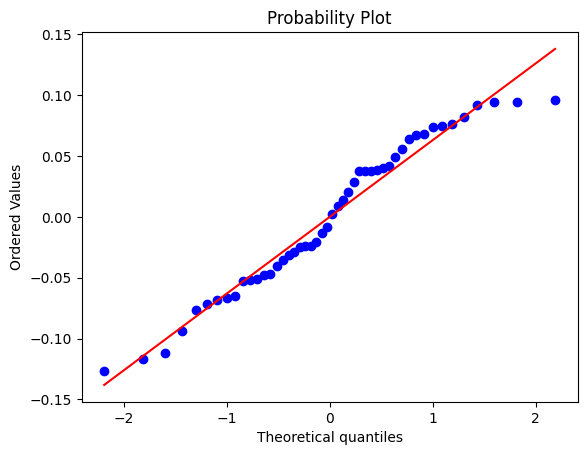

In [13]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

Similarly, the residuals mostly follow the reference line in the probability plot above, indicating that on the whole the residuals are normally distributed, with some variance (notably in the middle and at the extremes).

This can be seen in the following histogram:

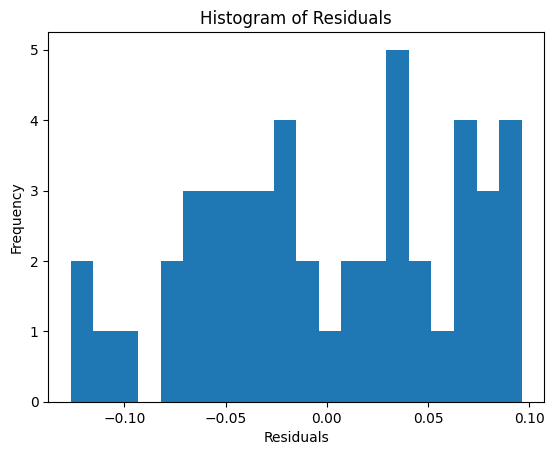

In [14]:
residuals.plot(kind='hist', bins=20, title="Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

In [15]:
from statsmodels.stats.diagnostic import het_breuschpagan

test_results = het_breuschpagan(residuals, model_full_fitted.model.exog)
print("Lagrange Multiplier p-value:", test_results[1])
print("F-statistic p-value:", test_results[3])

Lagrange Multiplier p-value: 0.04093259743973603
F-statistic p-value: 0.03840915921555295


The histogram above seems to demonstrate a slight bi-modal distrubution, and a Breusch-Pagan test also shows that there is not constant variation (heteroscedasticity), which suggest our model is not quite capturing the data correctly.

Finally, this is shown when displaying the residuals against the fitted data:

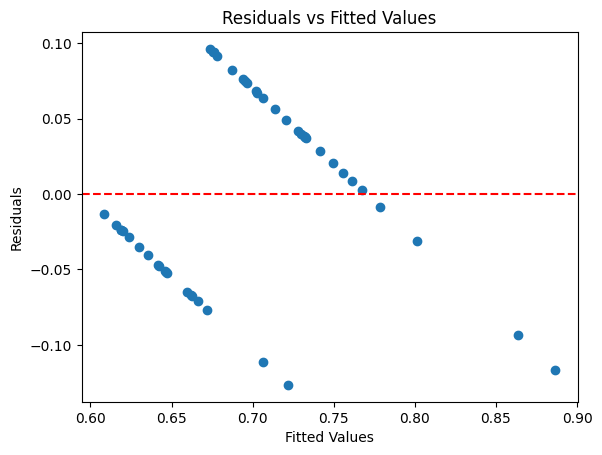

In [16]:
import matplotlib.pyplot as plt

residuals = model_full_fitted.resid
fitted_values = model_full_fitted.fittedvalues

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

This distribution should appear random, about the line at 0. However, there is a pattern, usually a feature of categorical data, but also an indicator that there may be an external predictor not included which could be having an interaction effect.

This is quite probable, as the choice of music to listen to will likely depend on a number of factors, many of them culturally determined, with weather only playing one part. But more likely it is the nature of the data itself that is creating such a pattern.